In [ ]:
# create own dataset from Google image

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *

In [ ]:
# search and scroll in Google Image
# download into file: run JS code (get_url.js) in browser to save the URLs of all images

In [ ]:
# create dir and upload urls file into your server
# 1. choose names for labeled images and mkdir
# 2. download images

# max_works: if have problem download, try with max_works=0 to see exceptions
# max_works: default is 8 and it means CPUs

In [41]:
folder = 'gjbwg'
file = 'urls_gjbwg.csv'

path = Path('data/landmark')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()

download_images(path/file, dest, max_pics = 50, max_workers=0)

In [46]:
folder = 'tam'
file = 'urls_tam.csv'

path = Path('data/landmark')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()

download_images(path/file, dest, max_pics = 50, max_workers=0)

In [45]:
folder = 'rmdht'
file = 'urls_rmdht.csv'

path = Path('data/landmark')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()
download_images(path/file, dest, max_pics = 50, max_workers=0)

In [ ]:
# remove any image that can not be open
# resize image less than max_size

In [47]:
classes = ['rmdht', 'tam', 'gjbwg']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [ ]:
# view images

In [48]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
# if already cleaned your data
# data = ImageDataBunch.from_csv(path, train=".", valid_pct=0.2, csv_labels="cleaned.csv", ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [52]:
# len(data.train_ds) + len(data.valid_ds): total number of image
# en(data.train_ds) and len(data.valid_ds) proportion: valid_pct=0.2
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['gjbwg', 'rmdht', 'tam'], 3, 94, 23)

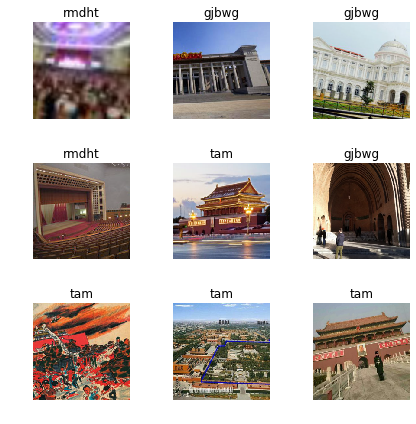

In [50]:
data.show_batch(rows=3, figsize=(6,6))

In [ ]:
# train the model

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn_fit_one_cycle(4)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

In [ ]:
learn.save("stage-2")

In [ ]:
# interpretation